
--- CASO PRINCIPAL: Visualizando 1 Canal para Sujeto RANDOM desde Tensor Global Y Calculando Rangos Globales ---
Cargando tensor desde: /home/diego/Escritorio/AAL3/AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned/GLOBAL_TENSOR_from_AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned.npz
  Claves encontradas en el archivo .npz: ['global_tensor_data', 'subject_ids', 'channel_names', 'rois_count', 'target_len_ts', 'tr_seconds', 'filter_low_hz', 'filter_high_hz', 'hrf_deconvolution_applied', 'hrf_model', 'channel_normalization_method_subject', 'notes_on_further_normalization', 'roi_order_name', 'roi_names_in_order', 'network_labels_in_order']
  Tensor global detectado. Forma: (431, 6, 131, 131)
  Sujetos: 431, Canales: 6, ROIs: 131

--- Rango de Valores por Canal (Min/Max a través de TODOS los sujetos) ---
  Canal 'Pearson_OMST_GC

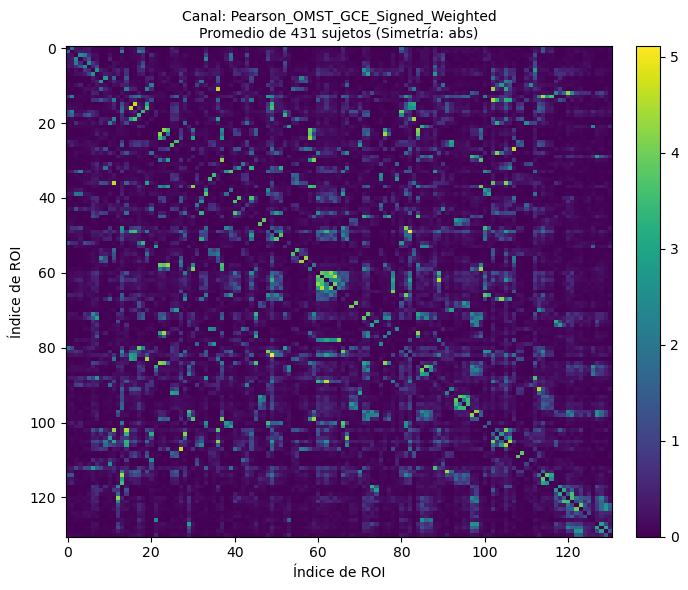

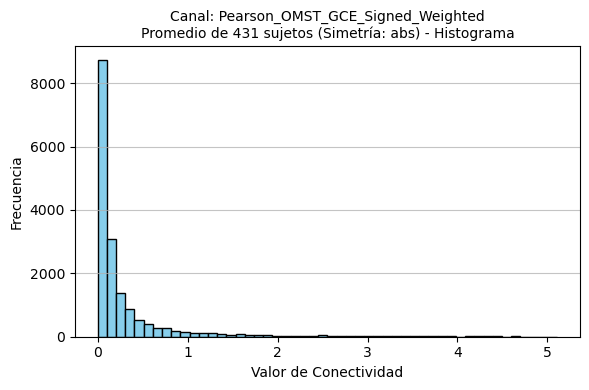


--- Visualizando Canal: Pearson_Full_FisherZ_Signed (Índice: 1) ---


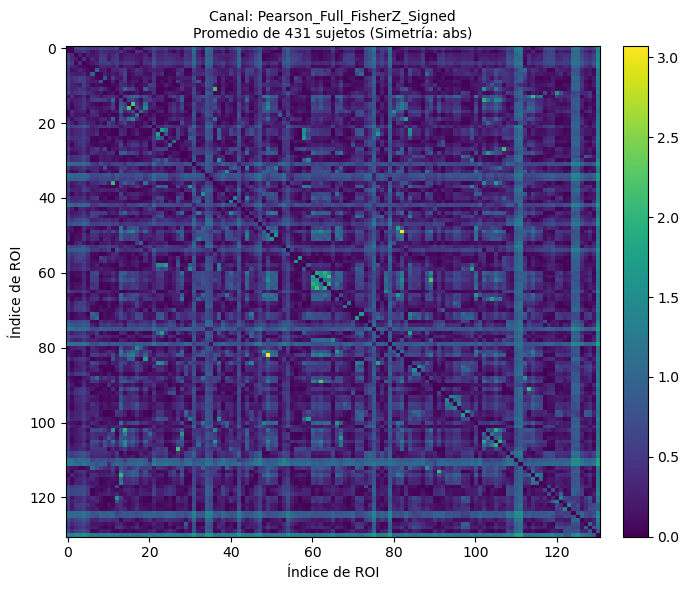

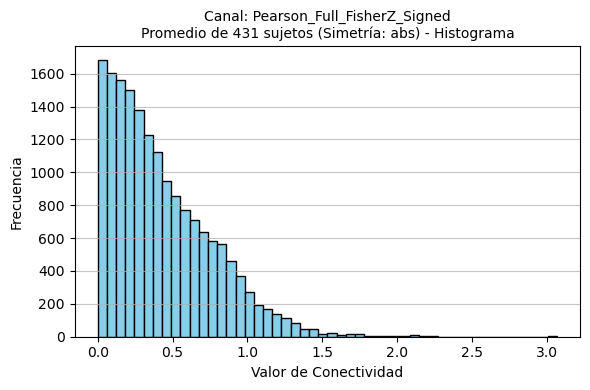


--- Visualizando Canal: MI_KNN_Symmetric (Índice: 2) ---


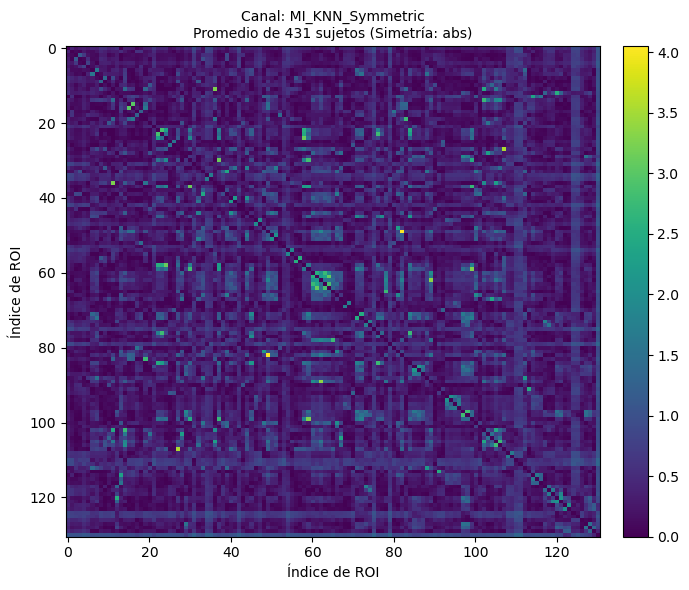

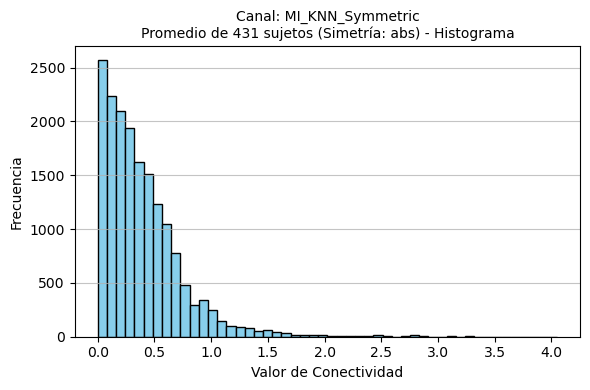


--- Visualizando Canal: dFC_AbsDiffMean (Índice: 3) ---


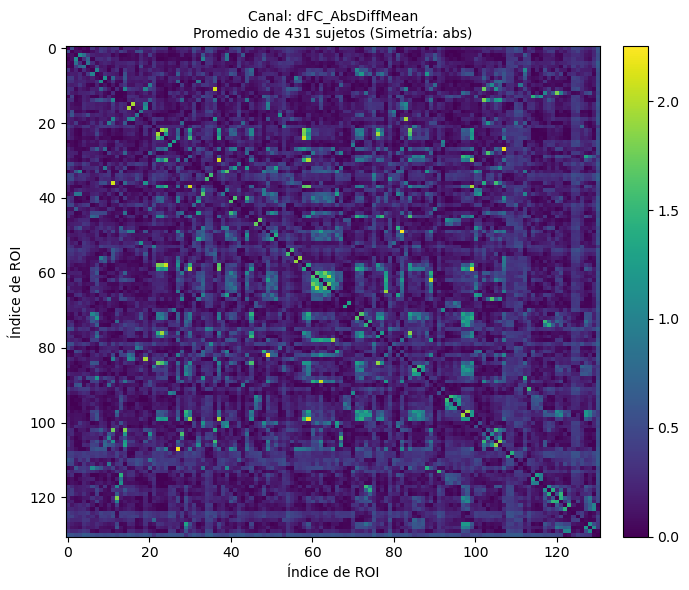

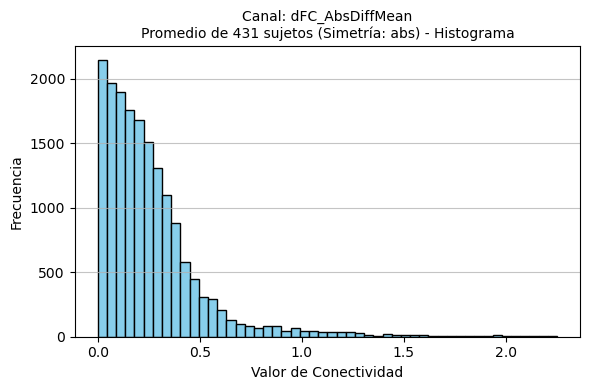


--- Visualizando Canal: dFC_StdDev (Índice: 4) ---


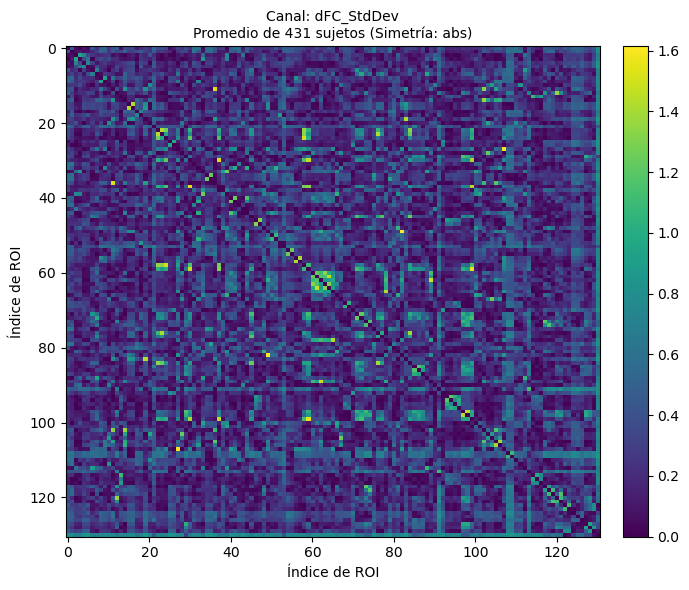

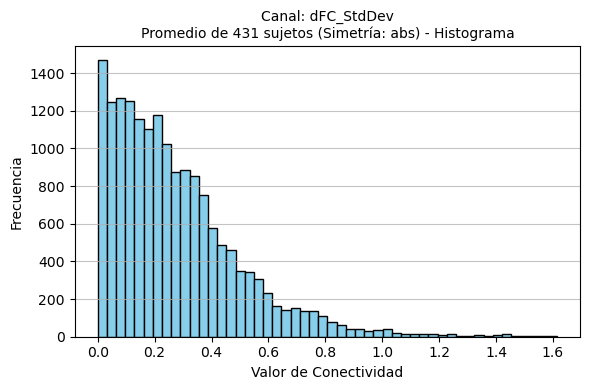


--- Visualizando Canal: Granger_F_lag1 (Índice: 5) ---


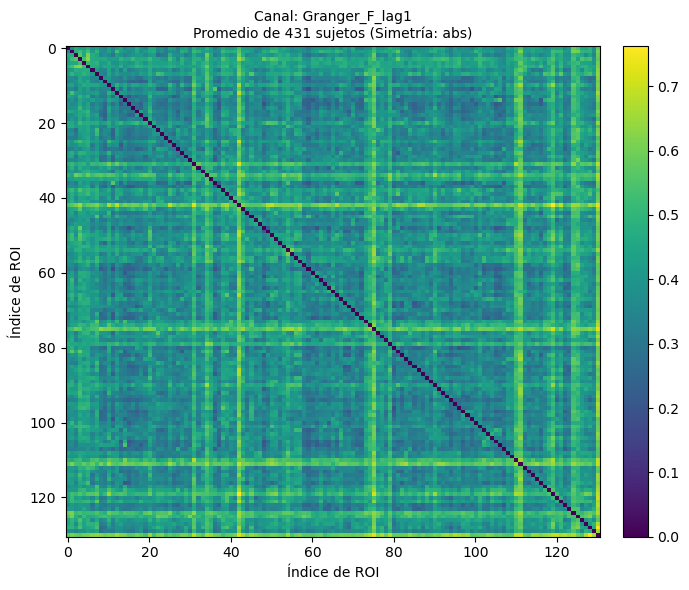

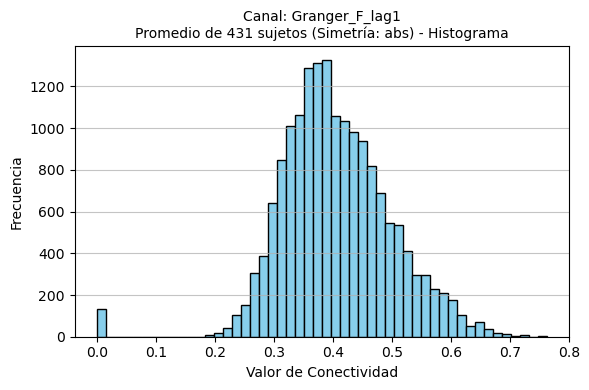


--- Ejemplo Adicional: Visualizando TODOS los Canales para Sujeto Específico '002_S_0729' desde Tensor Global ---
Cargando tensor desde: /home/diego/Escritorio/AAL3/AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned/GLOBAL_TENSOR_from_AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned.npz
  Claves encontradas en el archivo .npz: ['global_tensor_data', 'subject_ids', 'channel_names', 'rois_count', 'target_len_ts', 'tr_seconds', 'filter_low_hz', 'filter_high_hz', 'hrf_deconvolution_applied', 'hrf_model', 'channel_normalization_method_subject', 'notes_on_further_normalization', 'roi_order_name', 'roi_names_in_order', 'network_labels_in_order']
  Tensor global detectado. Forma: (431, 6, 131, 131)
  Sujetos: 431, Canales: 6, ROIs: 131
Seleccionando todos los 6 canales disponibles.
Sujeto para visualización encontrado por ID: '002_S_

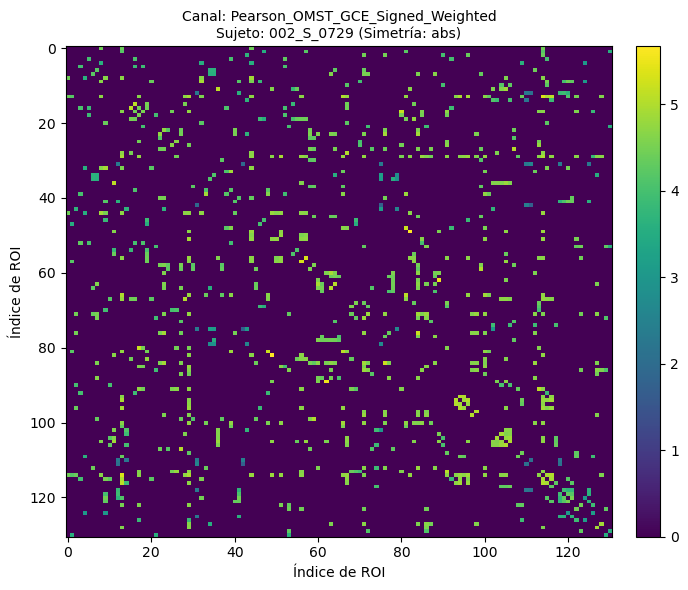

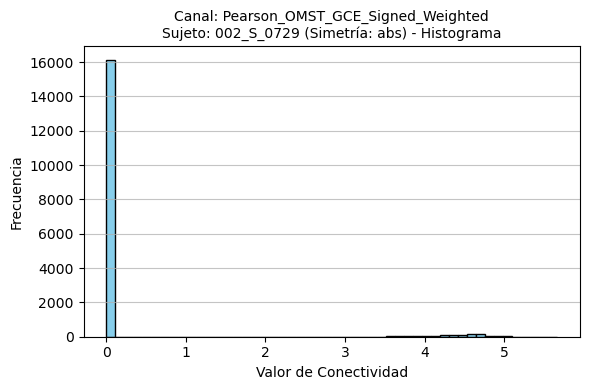


--- Visualizando Canal: Pearson_Full_FisherZ_Signed (Índice: 1) ---


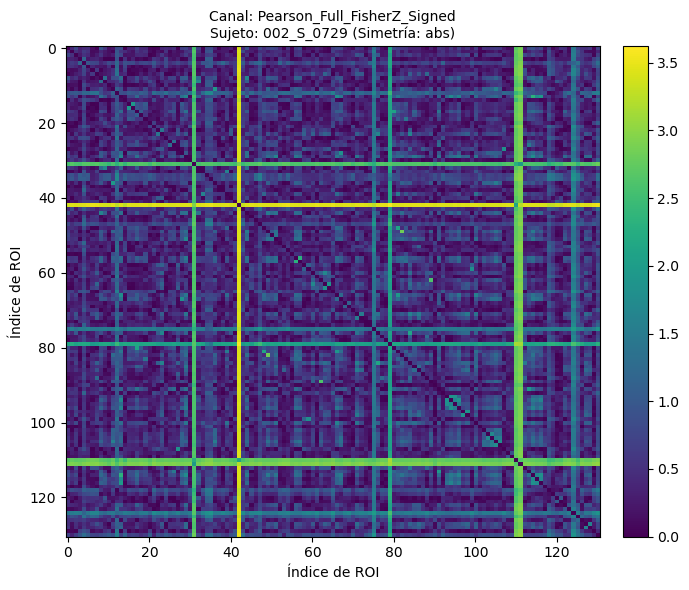

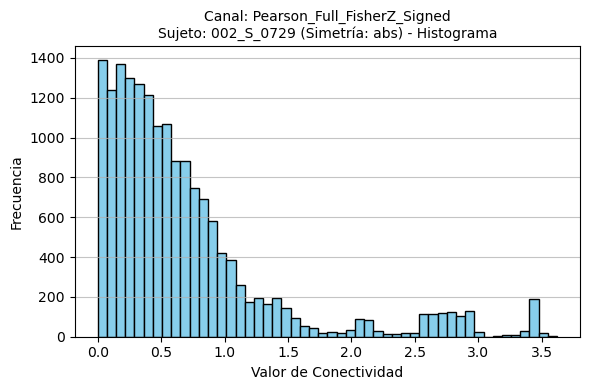


--- Visualizando Canal: MI_KNN_Symmetric (Índice: 2) ---


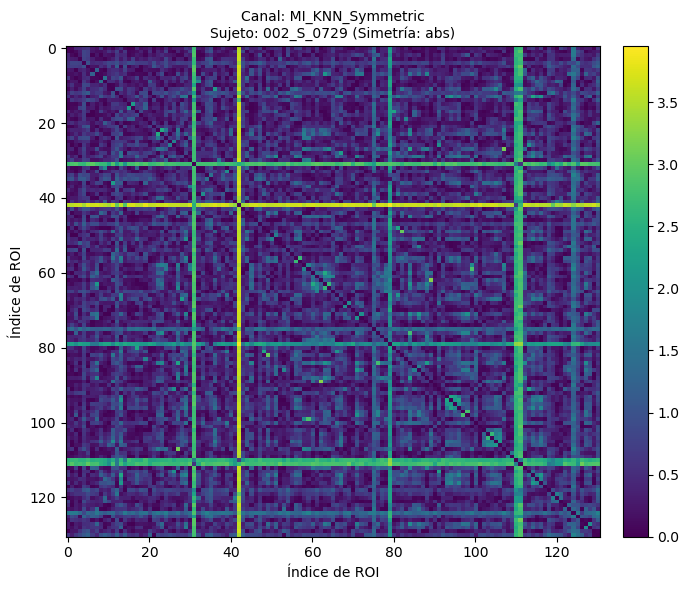

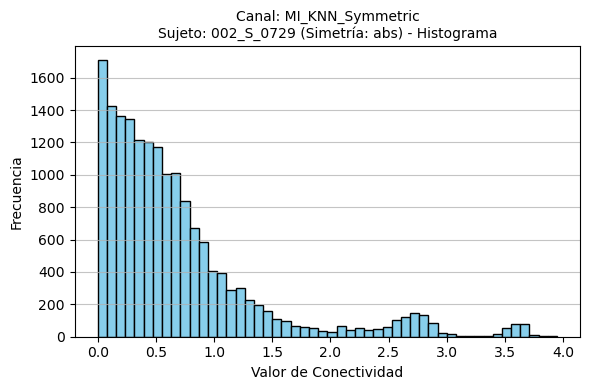


--- Visualizando Canal: dFC_AbsDiffMean (Índice: 3) ---


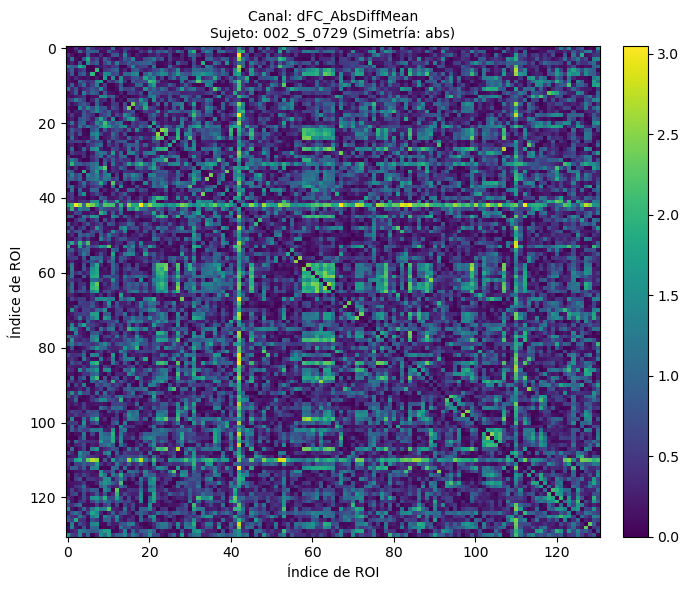

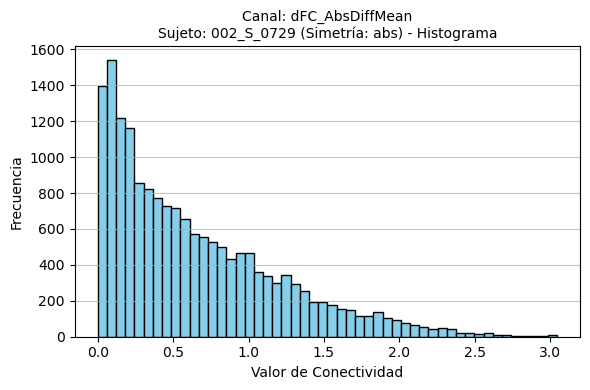


--- Visualizando Canal: dFC_StdDev (Índice: 4) ---


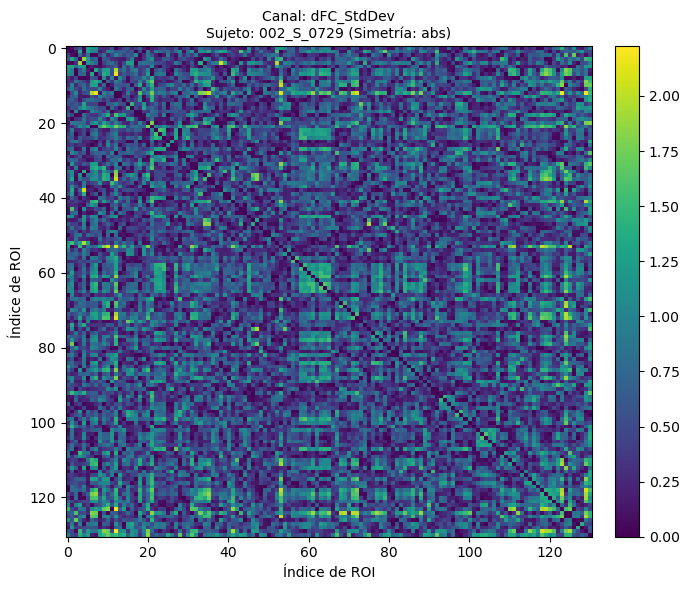

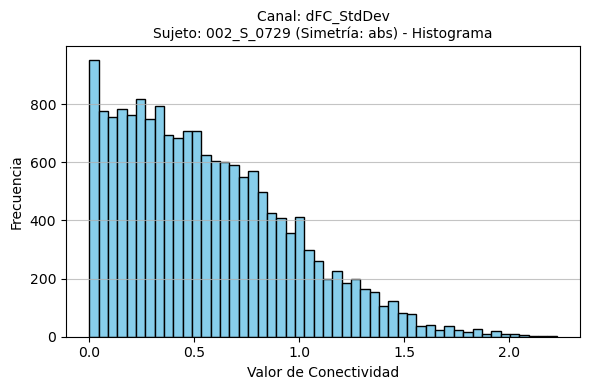


--- Visualizando Canal: Granger_F_lag1 (Índice: 5) ---


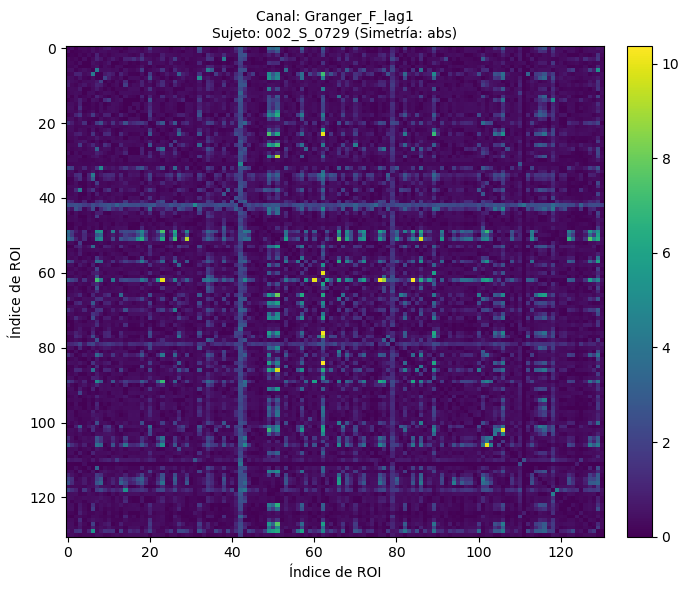

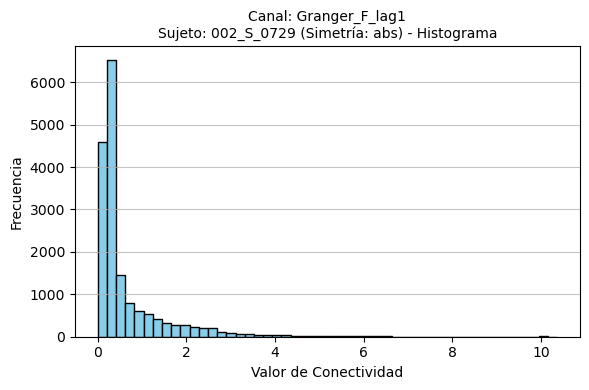


--- Fin de los ejemplos de ejecución ---


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Utilitario para Jupyter Notebook:
1. Cargar un tensor de conectividad (.npz) – individual o global –
2. Inspeccionar su metadata (nº sujetos, canales, ROIs, etc.)
3. Visualizar rápidamente:
    • La matriz de conectividad de un sujeto y canal específico (o todos)
    • La matriz promedio (entre sujetos) por canal
    • Histogramas de valores (para QC rápida)
4. Calcular rangos de valores por canal para todos los sujetos (en tensores globales).

Adaptado para correr en una celda de notebook.
"""
import sys
from pathlib import Path
from typing import Optional, Dict, Any, Tuple, List, Union
import numpy as np
import matplotlib.pyplot as plt
import random # Para seleccionar sujeto random

# ------- utilidades auxiliares ---------

def load_npz_tensor(npz_path: Path) -> Tuple[np.ndarray, Dict[str, Any]]:
    """Carga el .npz y devuelve tensor + metadatos."""
    if not npz_path.exists():
        raise FileNotFoundError(f"Archivo de tensor no encontrado: {npz_path}")
    
    print(f"Cargando tensor desde: {npz_path}")
    data = np.load(npz_path, allow_pickle=True)
    keys = list(data.keys())
    print(f"  Claves encontradas en el archivo .npz: {keys}")

    tensor: np.ndarray
    meta: Dict[str, Any]

    # Intenta obtener los nombres de los canales y IDs de sujetos de forma robusta
    # Proporciona valores predeterminados si no se encuentran.
    if 'global_tensor_data' in keys:
        tensor = data['global_tensor_data']
        # Asegurar que subject_ids y channel_names sean listas de strings
        subject_ids_raw = data.get('subject_ids')
        if subject_ids_raw is not None:
            subject_ids = [str(sid) for sid in subject_ids_raw]
        else:
            subject_ids = [f"Subj{i:03d}" for i in range(tensor.shape[0])]

        channel_names_raw = data.get('channel_names')
        if channel_names_raw is not None:
            channel_names = [str(cn) for cn in channel_names_raw]
        else:
            channel_names = [f"Ch{i}" for i in range(tensor.shape[1])]
            
        meta = {
            'subject_ids': subject_ids,
            'channel_names': channel_names,
            'rois_count': int(data['rois_count']) if 'rois_count' in keys else tensor.shape[-1],
            'type': 'global'
        }
        print(f"  Tensor global detectado. Forma: {tensor.shape}")
        print(f"  Sujetos: {len(meta['subject_ids'])}, Canales: {len(meta['channel_names'])}, ROIs: {meta['rois_count']}")
    elif 'tensor_data' in keys:
        tensor = data['tensor_data']
        subject_id_raw = data.get('subject_id')
        subject_ids = [str(subject_id_raw)] if subject_id_raw is not None else ["Unknown_Individual_Subject_ID"]

        channel_names_raw = data.get('channel_names')
        if channel_names_raw is not None:
            channel_names = [str(cn) for cn in channel_names_raw]
        else:
            channel_names = [f"Ch{i}" for i in range(tensor.shape[0])] # Asume que la primera dim es canales

        meta = {
            'subject_ids': subject_ids,
            'channel_names': channel_names,
            'rois_count': int(data['rois_count']) if 'rois_count' in keys else tensor.shape[-1],
            'type': 'individual'
        }
        print(f"  Tensor individual detectado. Forma: {tensor.shape}")
        print(f"  Sujeto: {meta['subject_ids'][0]}, Canales: {len(meta['channel_names'])}, ROIs: {meta['rois_count']}")
    else:
        raise ValueError("Estructura NPZ no soportada – se esperaba 'global_tensor_data' o 'tensor_data'.")
    
    # Validaciones de forma
    if meta['type'] == 'individual':
        # Para tensor individual: (Canales, ROIs, ROIs)
        expected_channels = len(meta['channel_names'])
        if not (tensor.ndim == 3 and tensor.shape[0] == expected_channels and \
                tensor.shape[1] == tensor.shape[2] and tensor.shape[1] == meta['rois_count']):
            print(f"Advertencia: La forma del tensor individual {tensor.shape} o rois_count {meta['rois_count']} "
                  f"o número de canales ({expected_channels}) podría no ser la esperada (Canales, ROIs, ROIs).")
    elif meta['type'] == 'global':
        # Para tensor global: (Sujetos, Canales, ROIs, ROIs)
        expected_subjects = len(meta['subject_ids'])
        expected_channels = len(meta['channel_names'])
        if not (tensor.ndim == 4 and tensor.shape[0] == expected_subjects and \
                tensor.shape[1] == expected_channels and \
                tensor.shape[2] == tensor.shape[3] and tensor.shape[2] == meta['rois_count']):
            print(f"Advertencia: La forma del tensor global {tensor.shape} o rois_count {meta['rois_count']} "
                  f"o número de sujetos ({expected_subjects}) o canales ({expected_channels}) podría no ser la esperada (Sujetos, Canales, ROIs, ROIs).")

    return tensor, meta


def pick_channel_indices(channel_arg: Union[str, int, List[Union[str, int]], None], 
                         channel_names: List[str]) -> List[int]: # Asegurar que channel_names es List[str]
    """Devuelve una lista de índices de canales. Si channel_arg es 'all' o None, devuelve todos."""
    # channel_names ya debería ser una lista de strings por la carga
    
    if channel_arg is None or (isinstance(channel_arg, str) and channel_arg.lower() == 'all'):
        print(f"Seleccionando todos los {len(channel_names)} canales disponibles.")
        return list(range(len(channel_names)))

    if not isinstance(channel_arg, list):
        channels_to_process = [channel_arg]
    else:
        channels_to_process = channel_arg
    
    indices = []
    for ch_ref in channels_to_process:
        try:
            idx = int(ch_ref) # Intenta convertir a índice numérico primero
            if not (0 <= idx < len(channel_names)):
                raise IndexError(f"Índice de canal {idx} fuera de rango (0-{len(channel_names)-1}).")
            print(f"Canal seleccionado por índice: {idx} ('{channel_names[idx]}')")
            indices.append(idx)
        except ValueError: # Si no es un entero, asume que es un nombre de canal
            try:
                idx = channel_names.index(str(ch_ref)) # Busca el nombre del canal
                print(f"Canal seleccionado por nombre: '{ch_ref}' (índice {idx})")
                indices.append(idx)
            except ValueError: # El nombre del canal no fue encontrado
                raise ValueError(f"Nombre de canal '{ch_ref}' no encontrado. Opciones disponibles: {channel_names}")
        except IndexError as e: # El índice numérico estaba fuera de rango
            raise e
    return sorted(list(set(indices))) # Devuelve índices únicos y ordenados


def symmetrize(mat: np.ndarray, mode: str) -> np.ndarray:
    """Aplica un tratamiento de simetría para visualización."""
    if mode == 'abs':
        return np.abs(mat)
    if mode == 'upper':
        # Asegura que la matriz sea cuadrada
        if mat.shape[0] != mat.shape[1]:
            print(f"Advertencia: La matriz para simetrizar no es cuadrada ({mat.shape}). Se devolverá sin cambios para 'upper'.")
            return mat
        tri = np.triu(mat) 
        return tri + tri.T - np.diag(np.diag(mat)) 
    return mat # 'none' o cualquier otro modo no reconocido


def plot_matrix(matrix: np.ndarray, title: str, save_fig: Optional[Path]):
    """Visualiza una matriz de conectividad."""
    if matrix.ndim != 2 or matrix.shape[0] == 0 or matrix.shape[1] == 0:
        print(f"Advertencia: La matriz para graficar no es 2D válida o está vacía: {matrix.shape}. Saltando gráfico.")
        return
        
    fig, ax = plt.subplots(figsize=(7, 6)) 
    im = ax.imshow(matrix, aspect='auto', cmap='viridis') 
    ax.set_title(title, fontsize=10)
    ax.set_xlabel('Índice de ROI')
    ax.set_ylabel('Índice de ROI')
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    if save_fig:
        try:
            save_fig.parent.mkdir(parents=True, exist_ok=True) # Asegura que el directorio exista
            fig.savefig(save_fig, dpi=300)
            print(f"Figura guardada en: {save_fig}")
        except Exception as e:
            print(f"Error al guardar la figura {save_fig}: {e}")
    else:
        plt.show()
    plt.close(fig) # Cierra la figura para liberar memoria


def plot_hist(values: np.ndarray, title: str, save_fig: Optional[Path]):
    """Visualiza un histograma de los valores de la matriz."""
    if values.size == 0:
        print(f"Advertencia: No hay valores para el histograma. Saltando gráfico.")
        return

    fig, ax = plt.subplots(figsize=(6,4))
    ax.hist(values.flatten(), bins=50, color='skyblue', edgecolor='black')
    ax.set_title(title, fontsize=10)
    ax.set_xlabel('Valor de Conectividad')
    ax.set_ylabel('Frecuencia')
    ax.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    if save_fig:
        try:
            save_fig.parent.mkdir(parents=True, exist_ok=True) # Asegura que el directorio exista
            fig.savefig(save_fig, dpi=300)
            print(f"Histograma guardado en: {save_fig}")
        except Exception as e:
            print(f"Error al guardar el histograma {save_fig}: {e}")
    else:
        plt.show()
    plt.close(fig) # Cierra la figura para liberar memoria

# --- NUEVA FUNCIÓN para calcular rangos ---
def calculate_and_print_channel_ranges(
    tensor_global: np.ndarray, 
    channel_names: List[str],
    subject_ids: List[str] # Añadido para consistencia, aunque no se usa directamente en el cálculo
    ) -> Dict[str, Dict[str, float]]:
    """
    Calcula y muestra el rango (mínimo y máximo) de valores para cada canal
    a través de todos los sujetos en un tensor global.
    Devuelve un diccionario con los rangos.
    """
    if tensor_global.ndim != 4:
        print("Advertencia: El cálculo de rango por canal es para tensores globales (Sujetos, Canales, ROIs, ROIs).")
        return {}
    
    num_subjects_tensor, num_channels_tensor, _, _ = tensor_global.shape

    if num_channels_tensor != len(channel_names):
        print(f"Advertencia: Discrepancia en el número de canales. Tensor tiene {num_channels_tensor} canales, "
              f"metadatos tienen {len(channel_names)} nombres de canal. Se usarán los nombres disponibles.")
        # Ajustar la lista de nombres de canal si es necesario, o usar índices genéricos
        # Por ahora, se truncará o rellenará con nombres genéricos si hay desajuste al acceder.

    if num_subjects_tensor != len(subject_ids):
         print(f"Advertencia: Discrepancia en el número de sujetos. Tensor tiene {num_subjects_tensor} sujetos, "
              f"metadatos tienen {len(subject_ids)} IDs. El cálculo de rango se hará sobre los datos del tensor.")


    print("\n--- Rango de Valores por Canal (Min/Max a través de TODOS los sujetos) ---")
    channel_value_ranges: Dict[str, Dict[str, float]] = {}

    for ch_idx in range(num_channels_tensor):
        # Selecciona todos los sujetos, el canal actual, todas las ROIs, todas las ROIs
        # Esto extrae una sub-matriz de (num_sujetos, num_rois, num_rois) para el canal actual
        channel_data_all_subjects = tensor_global[:, ch_idx, :, :]
        
        if channel_data_all_subjects.size == 0:
            print(f"  Canal índice {ch_idx}: No hay datos para calcular el rango.")
            min_val, max_val = np.nan, np.nan # O manejar de otra forma
        else:
            min_val = np.min(channel_data_all_subjects)
            max_val = np.max(channel_data_all_subjects)
        
        # Obtener el nombre del canal de forma segura
        ch_name = channel_names[ch_idx] if ch_idx < len(channel_names) else f"Canal_Índice_{ch_idx}"
        
        channel_value_ranges[ch_name] = {'min': float(min_val), 'max': float(max_val)}
        print(f"  Canal '{ch_name}': Mínimo = {min_val:.4f}, Máximo = {max_val:.4f}")
    
    print("--- Fin del cálculo de rangos ---")
    return channel_value_ranges

# ------- Función principal para Notebook -------------

def visualize_tensor_data(
    tensor_path_str: str, 
    channel_to_show: Union[str, int, List[Union[str, int]], None],
    subject_id_or_index: str = "0", # PUEDE SER "random" para tensor global
    show_average: bool = False, 
    symmetrize_mode: str = 'abs', 
    save_figure_prefix: Optional[str] = None,
    calculate_ranges_all_subjects: bool = False # NUEVO: Flag para activar el cálculo de rangos
) -> Optional[Dict[str, Dict[str, float]]]: # Devuelve los rangos si se calculan
    """
    Función principal para cargar, procesar y visualizar un tensor de conectividad.
    Si channel_to_show es 'all' o None, se visualizarán todos los canales (para el sujeto/promedio).
    Si subject_id_or_index es "random" (para tensores globales no promedio), se elige un sujeto al azar para visualización.
    Si calculate_ranges_all_subjects es True (para tensores globales), se calculan y muestran los rangos
    de valores para cada canal a través de todos los sujetos.
    Devuelve el diccionario de rangos si se calculan, sino None.
    """
    tensor_path = Path(tensor_path_str)
    calculated_ranges: Optional[Dict[str, Dict[str, float]]] = None

    try:
        tensor, meta = load_npz_tensor(tensor_path)
        
        # --- NUEVO: Cálculo de rangos si se solicita y es un tensor global ---
        if meta['type'] == 'global' and calculate_ranges_all_subjects:
            calculated_ranges = calculate_and_print_channel_ranges(tensor, meta['channel_names'], meta['subject_ids'])
            # La función continúa para la visualización después de calcular los rangos.

        # Determinar qué canales se van a visualizar (para el sujeto/promedio elegido)
        # Si channel_to_show es None o 'all', se usarán todos los canales disponibles en meta['channel_names']
        channel_indices_to_plot = pick_channel_indices(channel_to_show, meta['channel_names'])
        if not channel_indices_to_plot:
            print("No se seleccionaron canales para visualizar. Finalizando visualización.")
            return calculated_ranges # Devuelve los rangos si se calcularon

        # --- Manejo de la selección de sujeto para visualización ---
        subj_idx_for_plotting: Optional[int] = None # Índice del sujeto en el tensor global para graficar
        subject_id_for_plotting: str = "" # ID del sujeto para el título

        if meta['type'] == 'global':
            num_subjects_global = tensor.shape[0]
            if not show_average: # Si no es promedio, necesitamos un sujeto específico
                if subject_id_or_index.lower() == "random":
                    if num_subjects_global == 0:
                        raise ValueError("Tensor global no tiene sujetos para seleccionar uno aleatorio.")
                    subj_idx_for_plotting = random.randint(0, num_subjects_global - 1)
                    subject_id_for_plotting = meta['subject_ids'][subj_idx_for_plotting]
                    print(f"Sujeto aleatorio seleccionado para visualización: Índice {subj_idx_for_plotting}, ID: '{subject_id_for_plotting}'")
                else: # ID específico o índice numérico
                    try:
                        # Intenta encontrar por ID de sujeto (string)
                        subj_idx_for_plotting = meta['subject_ids'].index(subject_id_or_index)
                        subject_id_for_plotting = subject_id_or_index
                        print(f"Sujeto para visualización encontrado por ID: '{subject_id_for_plotting}' (índice {subj_idx_for_plotting}).")
                    except ValueError: 
                        # Si no es un ID, intenta convertir a índice numérico (int)
                        try:
                            subj_idx_for_plotting = int(subject_id_or_index)
                            if not (0 <= subj_idx_for_plotting < num_subjects_global):
                                raise IndexError(f"Índice de sujeto {subj_idx_for_plotting} fuera de rango (0 a {num_subjects_global - 1}).")
                            subject_id_for_plotting = meta['subject_ids'][subj_idx_for_plotting]
                            print(f"Sujeto para visualización seleccionado por índice: {subj_idx_for_plotting} ('{subject_id_for_plotting}').")
                        except ValueError: # No es ni ID conocido ni índice numérico válido
                            raise ValueError(
                                f"Argumento de sujeto para visualización '{subject_id_or_index}' no es un ID de sujeto válido "
                                f"({meta['subject_ids']}) ni un índice numérico para el tensor global."
                            )
                        except IndexError as e: # Índice numérico fuera de rango
                             raise e
        elif meta['type'] == 'individual':
            subj_idx_for_plotting = 0 # Solo hay un sujeto en el tensor individual
            subject_id_for_plotting = meta['subject_ids'][0]
            if show_average:
                print("Advertencia: 'show_average' se especificó para un tensor individual. Se mostrará el único sujeto.")
        
        # --- Iteración sobre los canales a VISUALIZAR ---
        for ch_idx_to_plot in channel_indices_to_plot:
            # Asegurarse de que ch_idx_to_plot esté dentro del rango de canales del tensor
            if not (0 <= ch_idx_to_plot < tensor.shape[1 if meta['type'] == 'global' else 0]):
                 print(f"Advertencia: Índice de canal {ch_idx_to_plot} fuera de rango para el tensor. Saltando este canal para visualización.")
                 continue

            channel_name_selected = meta['channel_names'][ch_idx_to_plot]
            print(f"\n--- Visualizando Canal: {channel_name_selected} (Índice: {ch_idx_to_plot}) ---")

            matrix_to_plot: Optional[np.ndarray] = None
            title_subject_part: str = ""

            if meta['type'] == 'individual':
                # Tensor individual: (Canales, ROIs, ROIs)
                # Acceder por tensor[ch_idx_to_plot, :, :]
                if tensor.ndim == 3 and 0 <= ch_idx_to_plot < tensor.shape[0]:
                    matrix_to_plot = tensor[ch_idx_to_plot, :, :]
                    title_subject_part = f"Sujeto: {subject_id_for_plotting}"
                else:
                    print(f"Advertencia: Tensor individual con forma/índice inesperado: {tensor.shape}, ch_idx: {ch_idx_to_plot}. Saltando canal {channel_name_selected}.")
                    continue

            elif meta['type'] == 'global':
                # Tensor global: (Sujetos, Canales, ROIs, ROIs)
                if show_average:
                    # Acceder por tensor[:, ch_idx_to_plot, :, :]
                    if tensor.ndim == 4 and 0 <= ch_idx_to_plot < tensor.shape[1]:
                        matrix_to_plot = np.mean(tensor[:, ch_idx_to_plot, :, :], axis=0)
                        title_subject_part = f"Promedio de {tensor.shape[0]} sujetos"
                    else:
                        print(f"Advertencia: Tensor global con forma/índice inesperado para promedio: {tensor.shape}, ch_idx: {ch_idx_to_plot}. Saltando canal {channel_name_selected}.")
                        continue
                else: # Visualizar un sujeto específico (random o elegido) del tensor global
                    if subj_idx_for_plotting is None : # No debería ocurrir si la lógica anterior es correcta
                         print(f"Error interno: Índice de sujeto para graficar no establecido. Saltando canal {channel_name_selected}.")
                         continue
                    # Acceder por tensor[subj_idx_for_plotting, ch_idx_to_plot, :, :]
                    if tensor.ndim == 4 and 0 <= subj_idx_for_plotting < tensor.shape[0] and 0 <= ch_idx_to_plot < tensor.shape[1]:
                        matrix_to_plot = tensor[subj_idx_for_plotting, ch_idx_to_plot, :, :]
                        title_subject_part = f"Sujeto: {subject_id_for_plotting}"
                    else:
                        print(f"Advertencia: Tensor global con forma/índices inesperados para selección de sujeto: {tensor.shape}, subj_idx: {subj_idx_for_plotting}, ch_idx: {ch_idx_to_plot}. Saltando canal {channel_name_selected}.")
                        continue
            
            if matrix_to_plot is None:
                print(f"Advertencia: No se pudo determinar la matriz a graficar para el canal {channel_name_selected}. Saltando.")
                continue

            matrix_processed = symmetrize(matrix_to_plot, symmetrize_mode)
            
            base_title = f"Canal: {channel_name_selected}\n{title_subject_part} (Simetría: {symmetrize_mode})"
            
            current_save_path_matrix = None
            current_save_path_hist = None
            if save_figure_prefix:
                # Construir un nombre de archivo descriptivo
                prefix_path = Path(save_figure_prefix)
                
                # Limpiar nombre de canal y sujeto para nombre de archivo
                clean_channel_name = "".join(c if c.isalnum() else "_" for c in channel_name_selected)
                clean_subject_id_for_filename = ""
                if meta['type'] == 'global':
                    if show_average:
                        clean_subject_id_for_filename = "AVG"
                    elif subject_id_for_plotting:
                         clean_subject_id_for_filename = "".join(c if c.isalnum() else "_" for c in subject_id_for_plotting)
                elif meta['type'] == 'individual' and subject_id_for_plotting:
                     clean_subject_id_for_filename = "".join(c if c.isalnum() else "_" for c in subject_id_for_plotting)

                fig_file_stem = f"{prefix_path.name}_ch_{clean_channel_name}"
                if clean_subject_id_for_filename:
                    fig_file_stem += f"_subj_{clean_subject_id_for_filename}"
                
                current_save_path_matrix = prefix_path.with_name(fig_file_stem + "_matrix.png")
                current_save_path_hist = prefix_path.with_name(fig_file_stem + "_hist.png")

            plot_matrix(matrix_processed, base_title, current_save_path_matrix)
            plot_hist(matrix_processed, base_title + " - Histograma", current_save_path_hist)
        
        return calculated_ranges

    except FileNotFoundError as e:
        print(f"Error de archivo: {e}", file=sys.stderr)
        return None
    except (ValueError, IndexError) as e:
        print(f"Error de configuración, datos o índice: {e}", file=sys.stderr)
        return None
    except Exception as e:
        print(f"Ocurrió un error inesperado: {e}", file=sys.stderr)
        # import traceback
        # traceback.print_exc() # Para debugging más detallado si es necesario
        return None


# --- EJEMPLOS DE USO EN UN NOTEBOOK ---
# Descomenta y ajusta las siguientes líneas para probar:

# --- Configuración de rutas (AJUSTA ESTAS RUTAS A TU SISTEMA) ---
# Directorio base donde se guardan los tensores individuales
INDIVIDUAL_TENSORS_BASE_DIR = Path("/home/diego/Escritorio/AAL3/AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned/individual_subject_tensors")
NOMBRE_ARCHIVO_TENSOR_GLOBAL = Path("/home/diego/Escritorio/AAL3/AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned/GLOBAL_TENSOR_from_AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned.npz")
    # Asegúrate de que estas rutas existan si CREATE_EXAMPLE_DATA = False
# INDIVIDUAL_TENSORS_BASE_DIR = Path("/ruta/a/tus/tensores/individuales")
# Archivo del tensor global
# NOMBRE_ARCHIVO_TENSOR_GLOBAL = Path("/ruta/a/tu/tensor/GLOBAL_TENSOR.npz")

# --- Para demostración, crearemos datos de ejemplo si las rutas anteriores no existen ---
# Puedes comentar/eliminar esta sección si ya tienes tus archivos NPZ.
CREATE_EXAMPLE_DATA = False # Poner en False si ya tienes tus datos
EXAMPLE_DATA_DIR = Path("./example_tensor_data")

if CREATE_EXAMPLE_DATA:
    EXAMPLE_DATA_DIR.mkdir(parents=True, exist_ok=True)
    INDIVIDUAL_TENSORS_BASE_DIR = EXAMPLE_DATA_DIR / "individual_subject_tensors"
    INDIVIDUAL_TENSORS_BASE_DIR.mkdir(parents=True, exist_ok=True)
    NOMBRE_ARCHIVO_TENSOR_GLOBAL = EXAMPLE_DATA_DIR / "GLOBAL_TENSOR_DEMO.npz"

    # Crear un NPZ global de ejemplo si no existe
    if not NOMBRE_ARCHIVO_TENSOR_GLOBAL.exists():
        print(f"Creando archivo NPZ global de ejemplo en {NOMBRE_ARCHIVO_TENSOR_GLOBAL}...")
        num_subjects_ex = 10
        num_channels_ex = 6
        num_rois_ex = 131  
        # Datos aleatorios entre -0.8 y 1.2 para simular conectividad
        example_global_tensor = (np.random.rand(num_subjects_ex, num_channels_ex, num_rois_ex, num_rois_ex) * 2.0) - 0.8
        example_subject_ids = np.array([f"DEMO_SUBJ_{i:03d}" for i in range(num_subjects_ex)], dtype='U')
        example_channel_names = np.array([f"FreqBand_{chr(65+i)}" for i in range(num_channels_ex)], dtype='U') # FreqBand_A, FreqBand_B
        np.savez_compressed(
            NOMBRE_ARCHIVO_TENSOR_GLOBAL,
            global_tensor_data=example_global_tensor,
            subject_ids=example_subject_ids,
            channel_names=example_channel_names,
            rois_count=np.int32(num_rois_ex)
        )
        print("NPZ global de ejemplo creado.")

    # Crear un NPZ individual de ejemplo si no existe
    subject_id_to_check_ex = "002_S_0295"
    file_name_individual_ex = f"tensor_{num_channels_ex}ch_{num_rois_ex}rois_{subject_id_to_check_ex}.npz"
    tensor_file_path_individual_ex = INDIVIDUAL_TENSORS_BASE_DIR / file_name_individual_ex
    if not tensor_file_path_individual_ex.exists():
        print(f"Creando archivo NPZ individual de ejemplo en {tensor_file_path_individual_ex}...")
        example_individual_tensor = (np.random.rand(num_channels_ex, num_rois_ex, num_rois_ex) * 1.5) - 0.5
        example_channel_names_ind = np.array([f"SensorType_{chr(88+i)}" for i in range(num_channels_ex)], dtype='U') # SensorType_X, Y
        np.savez_compressed(
            tensor_file_path_individual_ex,
            tensor_data=example_individual_tensor,
            subject_id=subject_id_to_check_ex,
            channel_names=example_channel_names_ind,
            rois_count=np.int32(num_rois_ex)
        )
        print("NPZ individual de ejemplo creado.")
else:
    # Define tus rutas aquí si CREATE_EXAMPLE_DATA es False
    # Ejemplo:
    INDIVIDUAL_TENSORS_BASE_DIR = Path("/home/diego/Escritorio/AAL3/AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned/individual_subject_tensors")
    NOMBRE_ARCHIVO_TENSOR_GLOBAL = Path("/home/diego/Escritorio/AAL3/AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned/GLOBAL_TENSOR_from_AAL3_dynamicROIs_fmri_tensor_NeuroEnhanced_v6.5.17_AAL3_131ROIs_OMST_GCE_Signed_GrangerLag1_ChNorm_ROIreorderedYeo17_ParallelTuned.npz")
    # Asegúrate de que estas rutas existan si CREATE_EXAMPLE_DATA = False
    if not INDIVIDUAL_TENSORS_BASE_DIR.exists() or not NOMBRE_ARCHIVO_TENSOR_GLOBAL.exists():
        print("ADVERTENCIA: CREATE_EXAMPLE_DATA es False, pero las rutas a los datos reales no parecen existir.")
        print(f"INDIVIDUAL_TENSORS_BASE_DIR: {INDIVIDUAL_TENSORS_BASE_DIR}")
        print(f"NOMBRE_ARCHIVO_TENSOR_GLOBAL: {NOMBRE_ARCHIVO_TENSOR_GLOBAL}")
        print("El script podría fallar si no encuentra los archivos NPZ.")


# --- CASO DE USO PRINCIPAL: Plotear sujeto random Y calcular rangos para todos los sujetos ---
if NOMBRE_ARCHIVO_TENSOR_GLOBAL.exists():
    print(f"\n--- CASO PRINCIPAL: Visualizando 1 Canal para Sujeto RANDOM desde Tensor Global Y Calculando Rangos Globales ---")
    # Para plotear solo un canal (ej. el primero, índice 0) del sujeto random:
    # Y calcular los rangos para todos los canales de todos los sujetos.
    channel_ranges = visualize_tensor_data(
        tensor_path_str=str(NOMBRE_ARCHIVO_TENSOR_GLOBAL),
        channel_to_show=0,                 # Mostrar solo el primer canal del sujeto random (o "all" para todos)
        subject_id_or_index="random",      # SELECCIONA UN SUJETO RANDOM para la visualización
        show_average=False,                # No queremos el promedio para la visualización del sujeto random
        calculate_ranges_all_subjects=True,# ¡SÍ, CALCULA Y MUESTRA LOS RANGOS GLOBALES!
        symmetrize_mode='abs',             # Modo de simetrización para la visualización
        save_figure_prefix=str(EXAMPLE_DATA_DIR / "qc_plots/GLOBAL_RANDOM_SingleChannel") # Opcional: para guardar figuras
    )
    if channel_ranges:
        print("\nDiccionario de rangos devuelto:")
        for ch, r in channel_ranges.items():
            print(f"  '{ch}': min={r['min']:.4f}, max={r['max']:.4f}")
else:
    print(f"Archivo de tensor global no encontrado para el caso principal: {NOMBRE_ARCHIVO_TENSOR_GLOBAL}")


# --- Ejemplo 1 (como el original): Visualizar TODOS los canales de un sujeto individual ---
# (Usando el archivo de ejemplo si se creó)
if CREATE_EXAMPLE_DATA: # Solo corre si se crearon datos de ejemplo
    if tensor_file_path_individual_ex.exists():
        print(f"\n--- Ejemplo Adicional: Visualizando TODOS los Canales para Tensor Individual: {subject_id_to_check_ex} ---")
        visualize_tensor_data(
            tensor_path_str=str(tensor_file_path_individual_ex),
            channel_to_show="all", # Palabra clave para mostrar todos los canales
            # save_figure_prefix=str(EXAMPLE_DATA_DIR / f"qc_plots/{subject_id_to_check_ex}_all_channels") # Opcional
        )
    else:
        print(f"Archivo individual de ejemplo no encontrado: {tensor_file_path_individual_ex}")

# --- Ejemplo 3 (como el original): Visualizar el promedio de TODOS los sujetos para TODOS los canales del tensor GLOBAL ---
if NOMBRE_ARCHIVO_TENSOR_GLOBAL.exists():
    print(f"\n--- Ejemplo Adicional: Visualizando Promedio Global para TODOS los Canales ---")
    visualize_tensor_data(
        tensor_path_str=str(NOMBRE_ARCHIVO_TENSOR_GLOBAL),
        channel_to_show="all", 
        show_average=True,
        calculate_ranges_all_subjects=False, # No necesitamos recalcular rangos aquí si ya los tenemos
        # save_figure_prefix=str(EXAMPLE_DATA_DIR / "qc_plots/GLOBAL_AVG_all_channels") # Opcional
    )
else:
    print(f"Archivo de tensor global no encontrado para el ejemplo de promedio: {NOMBRE_ARCHIVO_TENSOR_GLOBAL}")

# --- Ejemplo 4 (como el original): Visualizar TODOS los canales de un sujeto específico desde el tensor GLOBAL ---
if NOMBRE_ARCHIVO_TENSOR_GLOBAL.exists():
    # Para este ejemplo, tomaremos el primer ID de sujeto de los datos de ejemplo si existen,
    # o un placeholder si no.
    first_subject_id_example = "002_S_0729" # Asume que este ID existe en tu NPZ global si no usas los datos de ejemplo
    if CREATE_EXAMPLE_DATA and NOMBRE_ARCHIVO_TENSOR_GLOBAL.exists():
        try:
            data_temp = np.load(NOMBRE_ARCHIVO_TENSOR_GLOBAL, allow_pickle=True)
            if 'subject_ids' in data_temp and len(data_temp['subject_ids']) > 0:
                first_subject_id_example = str(data_temp['subject_ids'][0])
        except Exception as e:
            print(f"No se pudo cargar el ID del primer sujeto del NPZ de ejemplo: {e}")


    print(f"\n--- Ejemplo Adicional: Visualizando TODOS los Canales para Sujeto Específico '{first_subject_id_example}' desde Tensor Global ---")
    visualize_tensor_data(
        tensor_path_str=str(NOMBRE_ARCHIVO_TENSOR_GLOBAL),
        channel_to_show="all", 
        subject_id_or_index=first_subject_id_example, # ID del sujeto o su índice numérico
        show_average=False,
        # save_figure_prefix=str(EXAMPLE_DATA_DIR / f"qc_plots/GLOBAL_SUBJ_{first_subject_id_example}_all_channels")
    )
else:
    print(f"Archivo de tensor global no encontrado para el ejemplo de sujeto específico: {NOMBRE_ARCHIVO_TENSOR_GLOBAL}")

print("\n--- Fin de los ejemplos de ejecución ---")
